# Assignment7

Course: AP3021

Student Number: 109601003

Name: 林群賀

## Q7-1

### a. Use least-squares regression to fit a straight line. Compute the standard error [Eq.17.9] of the estimate and the correlation coefficient. Assess the fit. (Python+繪圖)

Condition number:  158.0603399688975
Standard Deviation: 1.3066526967183245
Coefficient of determination: 0.9143610668789809
Correlation Coefficient: 0.9562222894698601


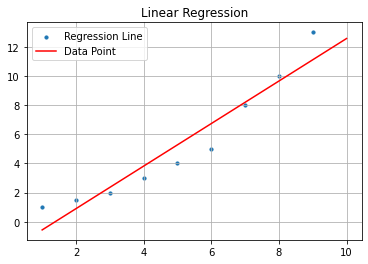

In [32]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,   2, 3, 4, 5, 6, 7,  8,  9])
y = np.array([1, 1.5, 2, 3, 4, 5, 8, 10, 13])

space = np.linspace(1, 10) # line space
A = np.zeros((2, 2))
B = np.zeros(2)

# Construct Matrix for solution
n = np.size(x)
m = 1
A[0, 0] = np.size(x)
A[0, 1] = np.sum(x)
A[1, 0] = np.sum(x)
A[1, 1] = np.sum(x ** 2)
B[0] = np.sum(y)
B[1] = np.sum(x * y)

# Solve AX=B to know a0(X[0]), a1(X[1])
X = np.inner(np.linalg.inv(A), B)
print("Condition number: ", np.linalg.cond(A))

# construct regression line
regress = X[1] * space + X[0]

St = np.sum((y - np.mean(y)) ** 2)
Sr = np.sum((y - X[0] - X[1] * x) ** 2)
Syx = np.sqrt(Sr / (n-(m+1)))
r2 = (St - Sr) / St
r = np.sqrt(r2)

print('Standard Deviation:', Syx)
print('Coefficient of determination:', r2)
print('Correlation Coefficient:', r)

plt.scatter(x, y, s=10)
plt.plot(space, regress, 'r')
plt.title("Linear Regression")
plt.legend(['Regression Line', 'Data Point'])
plt.grid()

plt.show()

### b. Use polynomial regression to fit a parabola to the data. Compute the standard error and correlation coefficient. Compare with (a). (Python+繪圖)

Condition number: 29878.808747043466
Standard Deviation: 0.3447712921158663
Coefficient of determination: 0.9948894656299115
Correlation Coefficient: 0.9974414597508525


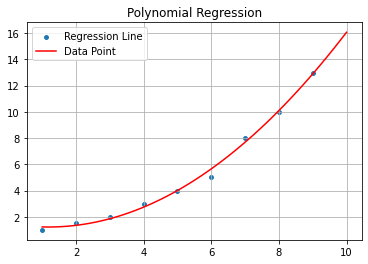

In [33]:
import matplotlib.pyplot as plt
import numpy as np

x = np.array([1,   2, 3, 4, 5, 6, 7,  8,  9])
y = np.array([1, 1.5, 2, 3, 4, 5, 8, 10, 13])

space = np.linspace(1, 10)

A = np.zeros((3, 3))
B = np.zeros(3)

# Construct Matrix for solution
n = np.size(x)
m = 2
A[0, 0] = np.size(x)
A[0, 1] = np.sum(x)
A[1, 0] = np.sum(x)
A[1, 1] = np.sum(x ** 2)
A[0, 2] = np.sum(x ** 2)
A[2, 0] = np.sum(x ** 2) 
A[1, 2] = np.sum(x ** 3)
A[2, 1] = np.sum(x ** 3)
A[2, 2] = np.sum(x ** 4)
B[0] = np.sum(y)
B[1] = np.sum(x * y)
B[2] = np.sum((x ** 2) * y)

# Solve AX=B to know a0(X[0]), a1(X[1])
X = np.inner(np.linalg.inv(A), B)
print("Condition number:", np.linalg.cond(A)) # Knowing the condition number

# construct regression line
regress = X[2] * (space ** 2) + X[1] * space + X[0]

# calculate St, Sr, Syx(STD), R^2, R
St = np.sum((y - np.mean(y)) ** 2)
Sr = np.sum((y - X[0] - X[1] * x - X[2] * (x ** 2)) ** 2)
Syx = np.sqrt(Sr / (n - (m + 1)))
r2 = (St - Sr) / St
r = np.sqrt(r2)

#print(A, B, X)
print('Standard Deviation:', Syx)
print('Coefficient of determination:', r2)
print('Correlation Coefficient:', r)

plt.scatter(x, y, s=15)
plt.plot(space, regress, 'r')
plt.title("Polynomial Regression")
plt.legend(['Regression Line', 'Data Point'])
plt.grid()

plt.show()

## Q7-2

### Fit an exponential model to the data. Plot the data and the equation on standard/semi-log graph. (Python+繪圖)

Condition number:  23.747545336711372
Standard Deviation: 0.05309182012655235
Coefficient of determination: 0.9935702501670921
Correlation Coefficient: 0.9967799406925744


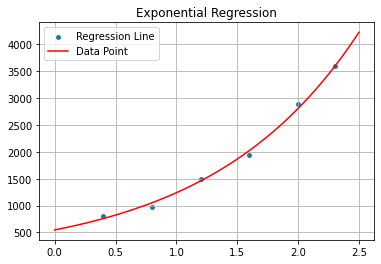

In [34]:
import numpy as np
import matplotlib.pyplot as plt

x = np.array([0.4, 0.8,  1.2,  1.6,    2,  2.3])
y = np.array([800, 980, 1500, 1945, 2900, 3600])
lnx = np.log(x)
lny = np.log(y)
a0 = 1
a1 = 1

space=np.linspace(0, 2.5) # line space

A = np.zeros((2, 2))
B = np.zeros(2)

# Construct Matrix for solution
n = np.size(lnx)
m = 1
A[0, 0] = np.size(x)
A[0, 1] = np.sum(x)
A[1, 0] = np.sum(x)
A[1, 1] = np.sum(x ** 2)
B[0] = np.sum(lny)
B[1] = np.sum(x * lny)

# Solve AX=B to know a0(X[0]), a1(X[1])
X = np.inner(np.linalg.inv(A), B)
print("Condition number: ", np.linalg.cond(A))

# Construct regression line
regress = X[1] * space + X[0]
exp_regress = np.exp(regress)

# calculate St, Sr, Syx(STD), R^2, R
St = np.sum((lny - np.mean(lny)) ** 2)
Sr = np.sum((lny - X[0] - X[1] * x) ** 2)
Syx = np.sqrt(Sr / (n - (m + 1)))
r2 = (St - Sr) / St
r = np.sqrt(r2)

# R = (A[0, 0] * B[1] - A[0,1] * B[0]) / 
# (np.sqrt(A[0, 0] * A[1, 1] - A[0, 1] ** 2) *
# np.sqrt(A[0, 0] * np.sum(y ** 2) - B[0] ** 2))

print('Standard Deviation:', Syx)
print('Coefficient of determination:', r2)
print('Correlation Coefficient:', r)

plt.scatter(x, y, s=15)
plt.plot(space, exp_regress, 'r')
plt.title("Exponential Regression")
plt.legend(['Regression Line', 'Data Point'])
plt.grid()

plt.show()

## Q7-3

### Use Newton’s interpolating polynomials of order 1 to 4 to get f(4). Choose your base points to attain good accuracy.(Python) (繪圖、值)

In [35]:
def f(m, n):
    
    a = (y[m] - y[n]) / (x[m] - x[n])

    return a

In [36]:
x = [1, 2,  3,  5,   7,   8]
y = [3, 6, 19, 99, 291, 444]
a = 4

ans = y[2] + (a - x[2]) * f(3, 2)

print("Newton's interpolating polynomials f(4) =", ans)

Newton's interpolating polynomials f(4) = 59.0


## Q7-4

### Repeat Q18.6 using Lagrange polynomials of order 1 to 3. (Python) (繪圖、值) Interpret your results in word or print in code

In [37]:
def NewtInt(x, y, n, x_miss):

    fdd = np.zeros((n, n))
    fdd[0:n, 0] = y[0:n]

    for j in range(1, n, 1):
        for i in range(0, n-j, 1):
            fdd[i, j] = (fdd[i + 1, j-1] - fdd[i, j - 1]) / (x[i + j] - x[i])

    y_interp = y[0]
    xterm = 1.0

    for order in range(1, n):
        xterm = xterm * (x_miss - x[order - 1])
        y_interp = y_interp + fdd[0, order] * xterm

    return y_interp

In [38]:
import numpy as np

x = [1, 2,  3,  5,   7,   8]
y = [3, 6, 19, 99, 291, 444]
n = 3
x_miss = 4

ans_New = NewtInt(x, y, n, x_miss)

print("Newton's interpolating polynomials f(4) =", ans_New)

Newton's interpolating polynomials f(4) = 42.0


## Q7-5 

### 1. Using (a) Linear interpolation (b) Newton’s interpolating polynomial (c) Cubic splines to estimate o(27).

### 2. Note that the exact result is 7.986 mg/L.

#### (a). Linear interpolation

Linear interpolation o27 = 8.000625
exact_result = 7.986
relative error = 0.001831329827197554


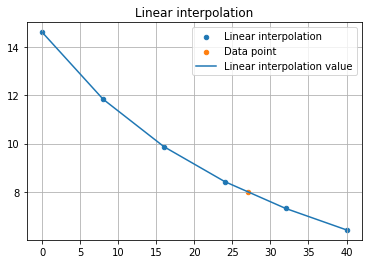

In [39]:
import numpy as np
import matplotlib.pyplot as plt

T = [     0,      8,    16,    24,    32,    40]
o = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
o27_1 = o[3] + (((o[4] - o[3]) / (T[4] - T[3])) * (27 - T[3]))
true_value = 7.986
ea = abs((true_value - o27_1) / true_value)

print('Linear interpolation o27 =', o27_1)
print('exact_result =', 7.986)
print('relative error =', ea)

plt.scatter(T, o, s=20)
plt.scatter(27, o27_1, s=20)
plt.plot(T, o)
plt.title("Linear interpolation")
plt.legend(['Linear interpolation', 'Data point', 'Linear interpolation value'])
plt.grid()

plt.show()

#### (b). Newton’s interpolating polynomial

In [40]:
def f(x, y):
    
    a = (o[x] - o[y]) / (T[x] - T[y])

    return a

def g(x, y, z):

    b = (f(x, y) - f(y, z)) / (T[x] - T[z])
    
    return b

def h(x, y, z, m):
    
    c = (g(x, y, z) - g(y, z, m)) / (T[x] - T[m])
    
    return c
    
def i(x, y, z, m, n):
    
    d = (h(x, y, z, m) - h(y, z, m, n)) / (T[x] - T[n])
    
    return d

In [41]:
import numpy as np
import matplotlib.pyplot as plt

T = [     0,      8,    16,    24,    32,    40]
o = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
true_value = 7.986

o27_2 = o[0] \
    + (27 - T[0]) * f(1, 0) \
    + (27 - T[0]) * (27 - T[1]) * g(2, 1, 0) \
    + (27 - T[0]) * (27 - T[1]) * (27 - T[2]) * h(3, 2, 1, 0) \
    + (27 - T[0]) * (27 - T[1]) * (27 - T[2]) * (27 - T[3]) * i(4, 3, 2, 1, 0)

ea = abs((true_value - o27_2) / true_value)

print("Newton's interpolation o27=",o27_2)
print('exact_result=',7.986)
print('relative error=',ea)

Newton's interpolation o27= 7.967420959472656
exact_result= 7.986
relative error= 0.00232645135579064


#### (c) Cubic splines to estimate o(27).

In [44]:
import numpy as np
import matplotlib.pyplot as plt

T = [     0,      8,    16,    24,    32,    40]
o = [14.621, 11.843, 9.870, 8.418, 7.305, 6.413]
true_value = 7.986

def cubic_inter(x0, x, y):

    x = np.array(x)
    y = np.array(y)
    # remove non finite values
    # indexes = np.isfinite(x)
    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.zeros(size)
    Li_1 = np.zeros(size - 1)
    z = np.zeros(size)

    # fill diagonals Li and Li - 1 and solve [L][y] = [B]
    Li[0] = np.sqrt(2 * xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i - 1] / Li[i - 1]
        Li[i] = np.sqrt(2 * (xdiff[i - 1] + xdiff[i]) - Li_1[i - 1] * Li_1[i - 1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i - 1] / xdiff[i - 1])
        z[i] = (Bi - Li_1[i - 1] * z[i - 1]) / Li[i]

    i = size - 1
    Li_1[i - 1] = xdiff[-1] / Li[i - 1]
    Li[i] = np.sqrt(2*xdiff[-1] - Li_1[i - 1] * Li_1[i - 1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i - 1]*z[i - 1])/Li[i]

    # solve [L.T][x] = [y]
    i = size - 1
    z[i] = z[i] / Li[i]
    for i in range(size - 2, -1, -1):
        z[i] = (z[i] - Li_1[i - 1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size - 1, index)

    xi1, xi0 = x[index], x[index - 1]
    yi1, yi0 = y[index], y[index - 1]
    zi1, zi0 = z[index], z[index - 1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0 / (6 * hi1) * (xi1 - x0) ** 3 \
        + zi1 / (6 * hi1) * (x0 - xi0) ** 3 \
        + (yi1 / hi1 - zi1 * hi1 / 6) * (x0 - xi0) \
        + (yi0 / hi1 - zi0 * hi1 / 6) * (xi1 - x0)
    
    return f0

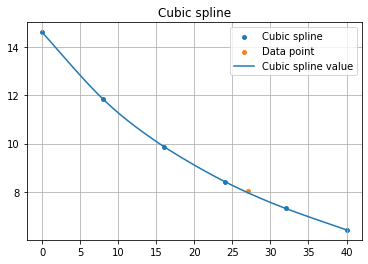

Cubic spline= 8.0106776431084
exact_result= 7.986
relative error= 0.003090113086451281


In [45]:
if __name__ == '__main__':

    x_new = np.linspace(0, 40, 40)
    plt.scatter(T, o, s=15)
    plt.scatter(27, cubic_inter(x_new, T, o)[26], s=15)
    plt.title('Cubic spline')
    plt.plot(x_new, cubic_inter(x_new,T,o))
    plt.legend(['Cubic spline','Data point','Cubic spline value'])
    plt.grid()
    plt.show()

print('Cubic spline=', cubic_inter(x_new,T,o)[26])
print('exact_result=', 7.986)
ea = abs((true_value - cubic_inter(x_new,T,o)[26])/true_value)
print('relative error=',ea)

## Q7-6

### 1. Generate 8 equally-spaced points from f = sin2t from 0 to 2𝜋. Fit this data with a cubic spline.(Python+繪圖)

In [46]:
import numpy as np
import matplotlib.pyplot as plt


PI = np.pi

def f(x):

    return (np.sin(x))**2


def cubic_inter(x0, x, y):

    x = np.array(x)
    y = np.array(y)
    # remove non finite values
    # indexes = np.isfinite(x)
    # check if sorted
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)
        x = x[indexes]
        y = y[indexes]

    size = len(x)
    xdiff = np.diff(x)
    ydiff = np.diff(y)

    # allocate buffer matrices
    Li = np.zeros(size)
    Li_1 = np.zeros(size - 1)
    z = np.zeros(size)

    # fill diagonals Li and Li - 1 and solve [L][y] = [B]
    Li[0] = np.sqrt(2 * xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # natural boundary
    z[0] = B0 / Li[0]

    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i - 1] / Li[i - 1]
        Li[i] = np.sqrt(2 * (xdiff[i - 1] + xdiff[i]) - Li_1[i - 1] * Li_1[i - 1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i - 1] / xdiff[i - 1])
        z[i] = (Bi - Li_1[i - 1] * z[i - 1]) / Li[i]

    i = size - 1
    Li_1[i - 1] = xdiff[-1] / Li[i - 1]
    Li[i] = np.sqrt(2*xdiff[-1] - Li_1[i - 1] * Li_1[i - 1])
    Bi = 0.0 # natural boundary
    z[i] = (Bi - Li_1[i - 1]*z[i - 1])/Li[i]

    # solve [L.T][x] = [y]
    i = size - 1
    z[i] = z[i] / Li[i]
    for i in range(size - 2, -1, -1):
        z[i] = (z[i] - Li_1[i - 1]*z[i+1])/Li[i]

    # find index
    index = x.searchsorted(x0)
    np.clip(index, 1, size - 1, index)

    xi1, xi0 = x[index], x[index - 1]
    yi1, yi0 = y[index], y[index - 1]
    zi1, zi0 = z[index], z[index - 1]
    hi1 = xi1 - xi0

    # calculate cubic
    f0 = zi0 / (6 * hi1) * (xi1 - x0) ** 3 \
        + zi1 / (6 * hi1) * (x0 - xi0) ** 3 \
        + (yi1 / hi1 - zi1 * hi1 / 6) * (x0 - xi0) \
        + (yi0 / hi1 - zi0 * hi1 / 6) * (xi1 - x0)
    
    return f0

IndexError: index 1 is out of bounds for axis 0 with size 0

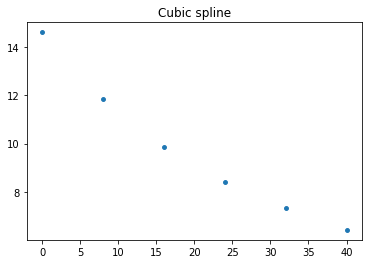

In [48]:
if __name__ == '__main__':

    x = [    PI / 4,     PI / 2, PI * 3 / 4, 
                 PI, PI * 5 / 4, PI * 6 / 4,
         PI * 7 / 4, PI * 2]

    for i in range(0, 8):
        y = [f(x[i])]

    plt.scatter(T, o, s=15)
    x_new = np.linspace(0, 2 * PI, 40)
    plt.title('Cubic spline')
    plt.plot(x_new, cubic_inter(x_new, x, y),'r')
    plt.legend(['Cubic spline', 'Data point'])
    plt.grid()
    plt.show()

    print('Cubic spline=',cubic_inter(x_new,x,y))